# normalization

In [1]:
# normalizaiotn is another method for feature scaling. the goal is to change the values of feature columns
#to use a common scale, without changing the relative values or losing information.

In [2]:
# normalisation techniques - minmax scaling, -mean normalization, - maxAbsScaling, - robust scaling.

# min max scaling

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('wine_data.csv', header =None, usecols=[0,1,2])
df.columns=['label', 'alcohol', 'malic acid']

In [9]:
df.sample(8)

,label,alcohol,malic acid
12,1,13.75,1.73
56,1,14.22,1.70
170,3,12.20,3.03
6,1,14.39,1.87
126,2,12.43,1.53
173,3,13.71,5.65
101,2,12.60,1.34
76,2,13.03,0.90


<Axes: xlabel='alcohol', ylabel='Density'>

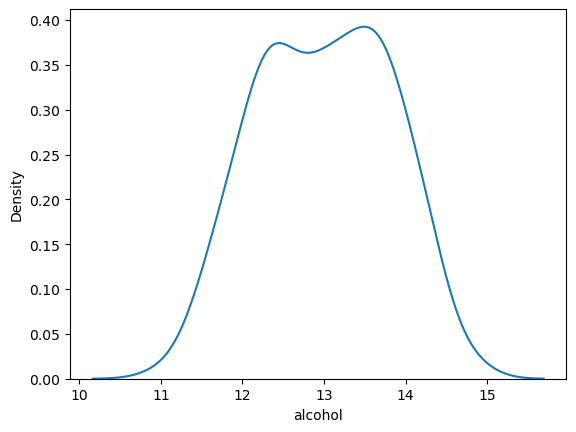

In [10]:
#kde plot for alcohol & malic acid
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

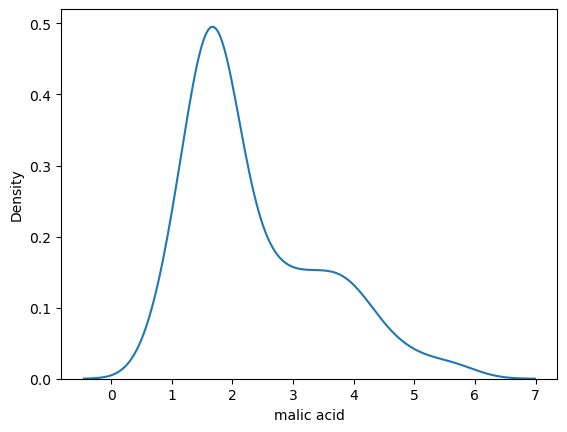

In [12]:
sns.kdeplot(df['malic acid'])

In [13]:
# 2d scatterplot - with alcohol on x-axis, malic acid on y-axis and class distribution 1,2,3 with different colors

<Axes: xlabel='alcohol', ylabel='malic acid'>

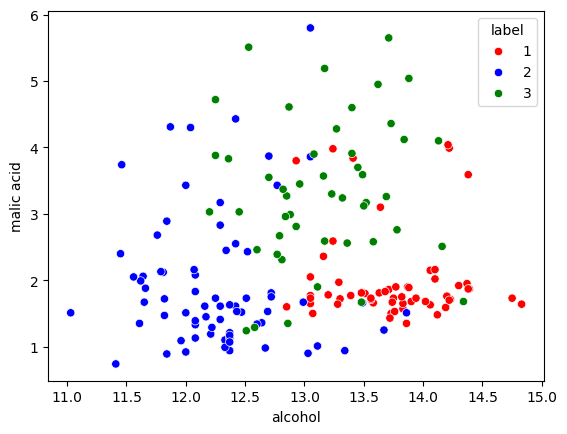

In [18]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x =df['alcohol'], y=df['malic acid'], hue=df['label'],palette=color_dict)

In [19]:
#train and test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1),
                                                   df['label'],
                                                   test_size=0.3,
                                                   random_state=0)

In [33]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [34]:
# call minmax scaler from scikitlearn, fit it it traininng test, transform it to both test and training sets.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [39]:
#range of min and max values before minmax scaling vary
np.round(X_train.describe(), 1)

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [40]:
# range of min and maximum values after scaling is [0,1]
np.round(X_train_scaled.describe(), 1)

,alcohol,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [41]:
# scatterplot before and after,
# we spot no difference in relative values but absolute values are scaled between [0,1]

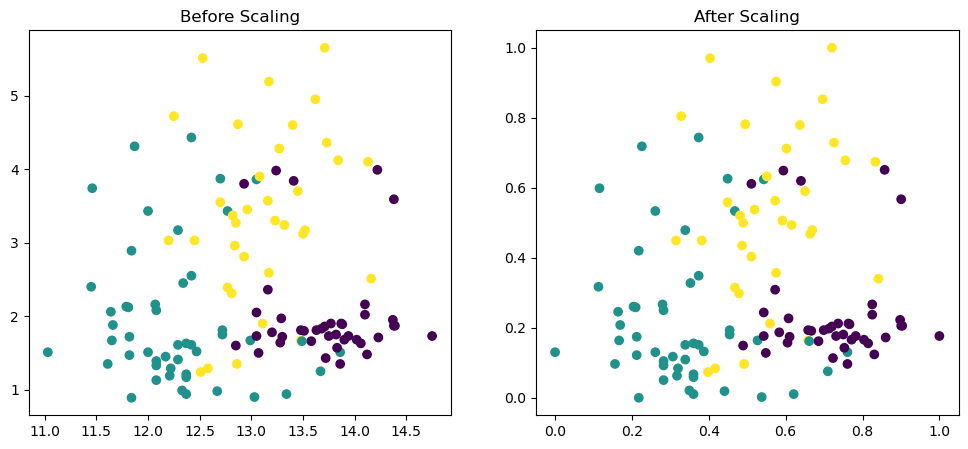

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['alcohol'], X_train['malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

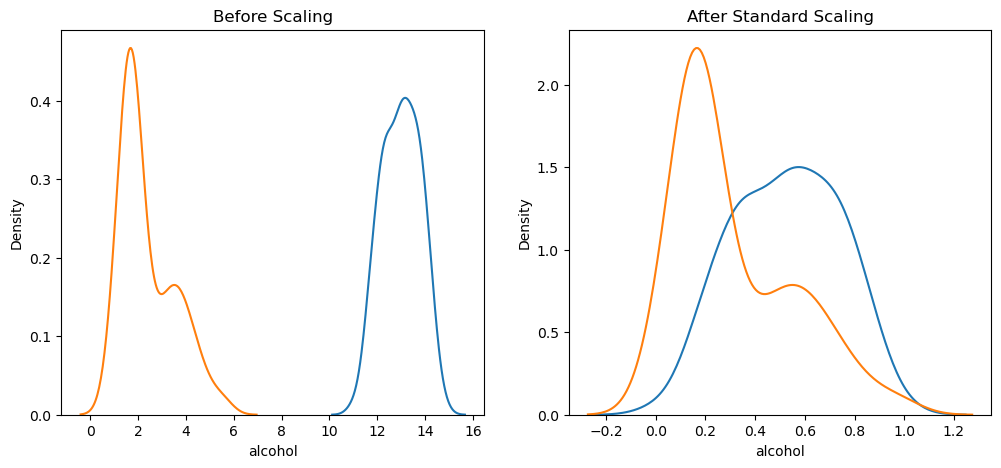

In [45]:
#changes on plot before and after scaling for both features

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['malic acid'], ax=ax2)
plt.show()

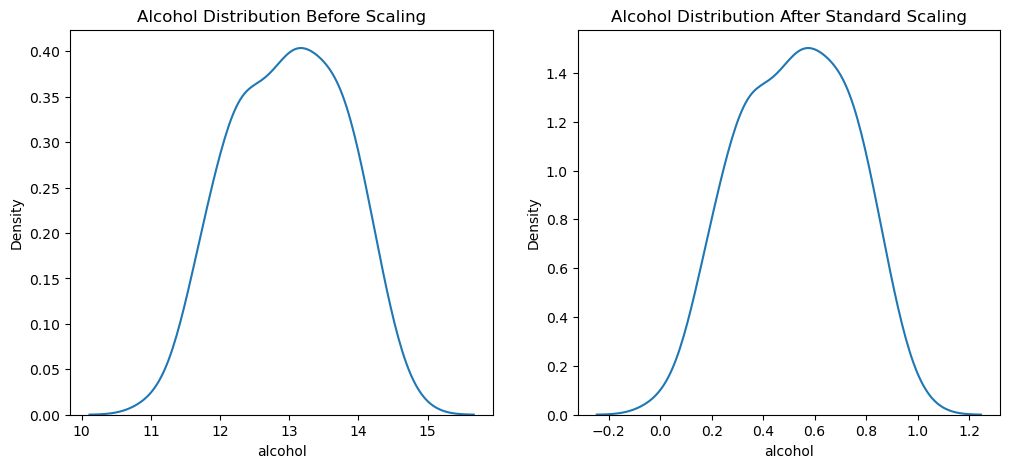

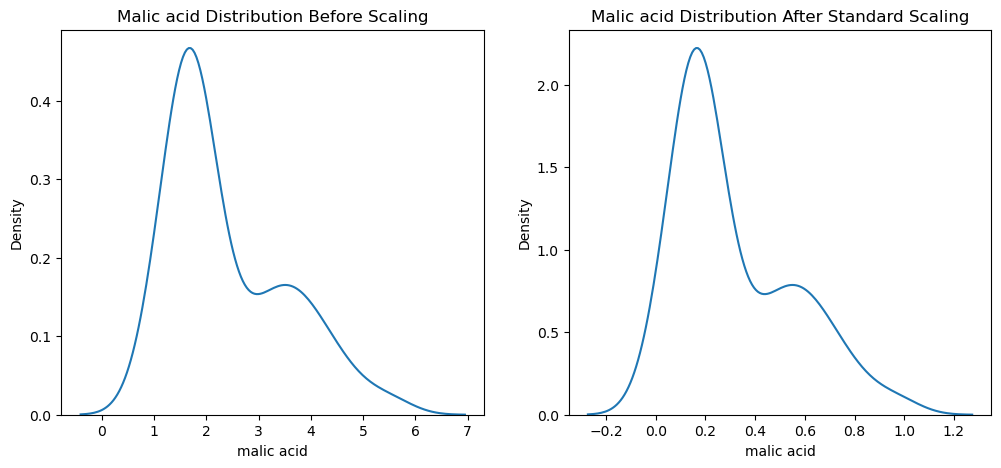

In [47]:
#for alcohol
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
plt.show()

# for malic acid

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['malic acid'], ax=ax2)
plt.show()